In [101]:
import matplotlib.pyplot as plt
import math
import numpy as np
from scipy import optimize

In [102]:
def draw(Ox: list[list], Oy: list[list], names: list[str],
         scatter: bool = False):
    f = plt.figure(figsize=(10, 7))
    px1 = f.add_subplot(111)
    if not scatter:
        for x, y, name in zip(Ox, Oy, names):
            px1.plot(x, y, label=name)
    else:
        for x, y in zip(Ox, Oy, names):
            px1.scatter(x, y, label=name)
    px1.legend()
    f.show()

def draw_on_plot(Ox: list[list], Oy: list[list], names: list[str],
                 px1, scatter: bool = False):
    if not scatter:
        for x, y, name in zip(Ox, Oy, names):
            px1.plot(x, y, label=name)
    else:
        for x, y in zip(Ox, Oy, names):
            px1.scatter(x, y, label=name)

In [103]:
def fx(xvn, yvn, a):
    return 5*xvn + 3*yvn

def fy(xvn, yvn, c, b):
    return -3*xvn - yvn

def fx2(xvn, yvn, a, b ,c):
    return 5*xvn + 3*yvn

def fy2(xvn, yvn,a ,b ,c):
    return -3*xvn - yvn

In [104]:
"""Явный метод Эйлера 1-го порядка"""
def explicit_method(T, a, xvn, yvn, c, b):
    xn1 = T*fx(xvn, yvn, a) + xvn
    yn1 = T*fy(xvn, yvn, c, b) + yvn
    return (xn1, yn1)

In [105]:
"""Явный метод Рунге-Кутты 4-го порядка"""
def explicit4_method(T, a, xvn, yvn, c, b):
    kx1 = T * fx(xvn, yvn, a)
    ky1 = T * fy(xvn, yvn, c, b)
    
    kx2 = T * fx(xvn + 1/2*kx1, yvn + 1/2*ky1, a)
    ky2 = T * fy(xvn + 1/2*kx1, yvn + 1/2 * ky1, c, b)
     
    kx3 = T * fx(xvn + 1/2*kx2, yvn + 1/2 * ky2, a)
    ky3 = T * fy(xvn + 1/2*kx2, yvn + 1/2 * ky2, c, b)
    
    kx4 = T * fx(xvn + 1*kx3, yvn + 1 * ky3, a)
    ky4 = T * fy(xvn + 1*kx3, yvn + 1 * ky3, c, b)
    
    xn = xvn + (kx1 + 2 * kx2 + 2 * kx3 + kx4)/6.0
    yn = yvn + (ky1 + 2 * ky2 + 2 * ky3 + ky4)/6.0
    return (xn, yn)

$$\frac{(y_{n+1} - y_n)}{T} = f(x_n, y_{n+1})$$
$$


In [106]:
# TODO: remove list, можно использовать предыдущее значение
def newtonsMethod(T, x, y):
    prev_x = x  # list of x(y) values
    for _ in range(100):
        xn = prev_x  # previous value of x
        
        # y_x - y = (-3*xn-y_x) * T  # y выраженный через х
        y_x = (-3*T*xn + y) / (1 + T)
        
        f = -xn + (5 * xn + 3 * y_x) * T + x
        g = -1 + 5 * T + 3 * T * (-3 * T) / (1 + T)
        
        x = prev_x - f/g
        prev_x = x
    return prev_x

In [107]:
"""Неявный метод Эйлера 1-го порядка"""
def implicit_method(T, a, xvn, yvn, c, b):
    xn2 = newtonsMethod(T, xvn, yvn)
    yn2 = (-3 * T * xn2 + yvn)/(1+T)

    return (xn2, yn2)

[scipy root](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.root.html),
[Jacobian](<https://math.libretexts.org/Bookshelves/Calculus/Supplemental_Modules_(Calculus)/Vector_Calculus/3%3A_Multiple_Integrals/3.8%3A_Jacobians>)


In [108]:
"""Неявный метод Хаммера-Холлингсворта 4-го порядка"""
def implicit2_method(T, ak, xvn, yvn, ck, bk):
     # Таблица Бутчера
     a = [[1/4, 1/4 - math.sqrt(3)/6],
          [1/4 + math.sqrt(3)/6, 1/4]]
     c = [(1/2 - math.sqrt(3)/6), 1/2 + math.sqrt(3)/6]
     b = [1/2, 1/2]

     # 5x+3y
     # -3y-x
     # x[0] = kx1, x[1] = kx2
     def fkx(x):
          xvn1 = xvn + T * (a[0][0] * x[0] + a[0][1] * x[1])
          xvn2 = xvn + T * (a[1][0] * x[0] + a[1][1] * x[1])
          # т.к. уравнения равны нулю, вычитаем kx1 и kx2
          return [5 * xvn1 + 3 * (yvn + c[0] * T) - x[0],
                  5 * xvn2 + 3 * (yvn + c[1] * T) - x[1]]
     
     def jac_fkx(x):
          xvn1 = xvn + T * (a[0][0] * x[0] + a[0][1] * x[1])
          xvn2 = xvn + T * (a[1][0] * x[0] + a[1][1] * x[1])
          # Якобиан системы, частные производные от каждого
          # уравнения по каждой переменной
          return np.array([[5 * T * a[0][0] - 1,
                          5 * T * a[0][1]],
                          [5 * T * a[1][0],
                          5 * T * a[1][1] - 1]])


     sol = optimize.root(fun=fkx, x0=[0, 0],
                         jac=jac_fkx, method='hybr')
     xn = xvn + T * (b[0] * sol.x[0] + b[1] * sol.x[1])

     # y[0] = ky1, y[1] = ky2
     # -3x-y
     def fky(y):
          yvn1 = yvn + T * (a[0][0] * y[0] + a[0][1] * y[1])
          yvn2 = yvn + T * (a[1][0] * y[0] + a[1][1] * y[1])
          return [-3*(xvn + c[0] * T) - yvn1 - y[0],
                  -3*(xvn + c[1] * T) - yvn2 - y[1]]
     
     def jac_fky(y):
          return np.array([[-T * a[0][0] - 1,
                          -T * a[0][1]],
                          [-T * a[1][0],
                          -T * a[1][1] - 1]])

     sol = optimize.root(fun=fky, x0=[0, 0],
                         jac=jac_fky, method='hybr')
     yn = yvn + T * (b[0] * sol.x[0] + b[1] * sol.x[1])

     return (xn, yn)

In [109]:
# новый шаг
def get_p(array):
    s = sum([i ** 2 for i in array])
    return math.sqrt(s)

# T0 - максимальный возможный шаг
def new_T(last_T, T0, array, array_prev, L):
    p = get_p(array)
    F = [i / p for i in array]
    p_prev = get_p(array_prev)
    F_prev = [i / p_prev for i in array_prev]
    X = [(F[i] - F_prev[i]) / last_T for i in range(len(F))]
    XX = sum([i ** 2 for i in X])
    new_T = T0 / (1 + math.sqrt(L) * XX ** (1/4))
    return new_T

In [110]:
# def implicit2_method(T, a, xvn3, yvn3, c, b):
#     yn3 = (2*(1-5/2*T)*yvn3-(3*xvn3+yvn3)*(T-5/2*T*T)-3/2*T*T*(5*xvn3 + 3*yvn3)-3*T*xvn3)/(2*(1-2*T+T*T))
#     xn3 = (1/2*(5*xvn3+3*yvn3+3*yn3)*T + xvn3)/(1-5/2*T)
#     return (xn3, yn3)

In [111]:
def do_method(method, t_start, t_finish, array, variables, dynamic_step: bool=True):
    T, a, b, c = [i for i in variables]
    max_step = T
    tl = [t_start]
    array_T = [T]
    array_dif = [(fx(array[-1][0], array[-1][1], a),
                    fy(array[-1][0], array[-1][1], c, b))]
    while tl[-1] <= t_finish:
        array.append(method(T, a, array[-1][0], array[-1][1], c, b))
        array_dif.append((fx(array[-1][0], array[-1][1], a),
                fy(array[-1][0], array[-1][1], c, b)))
        tl.append(tl[-1] + T)
    return (tl, array, array_dif)

In [112]:
# T = 0.0001
# MD = []
# TA = []
# while T <= 0.1:
#     TA.append(T)
#     C1 = 1
#     C2 = 2
#     # T = 0.001
#     t_start = 0
#     t_finish = 5
#     a = 1
#     # fig1 = plt.figure(figsize=(10,18))
#     # px1 = fig1.add_subplot(111)
#     # fig2 = plt.figure(figsize=(14, 14))
#     # px2 = fig2.add_subplot(111)
#     # fig3 = plt.figure(figsize=(14, 14))
#     # px3 = fig3.add_subplot(111)
#     c = 0.5
#     b = 0.60
#     # Первый элемент это x, второй y
#     variables = (T, a, b, c)
#     # array0 = [(2, 0)]
#     array1 = do_method(explicit_method, t_start, t_finish, [((C1+3*C2*t_start) * math.e**(2*t_start), (C2 - C1 - 3 * C2 * t_start) * math.e**(2*t_start))], variables, False)
#     array2 = do_method(implicit2_method, t_start, t_finish, [t_start], [((C1+3*C2*t_start) * math.e**(2*t_start), (C2 - C1 - 3 * C2 * t_start) * math.e**(2*t_start))], variables, False)
#     array3 = do_method(impl2, t_start, t_finish, [t_start], [((C1+3*C2*t_start) * math.e**(2*t_start), (C2 - C1 - 3 * C2 * t_start) * math.e**(2*t_start))], variables, False)

#     arrayx1 = [i[0] for i in array1[1]]
#     arrayy1 = [i[1] for i in array1[1]]
#     arrayx2 = [i[0] for i in array2[1]]
#     arrayy2 = [i[1] for i in array2[1]]
#     arrayx3 = [i[0] for i in array3[1]]
#     arrayy3 = [i[1] for i in array3[1]]
#     max_dif = [0, 0, 0]
#     tl = array2[0]
#     for i in range(len(array1[0])):
#         real_x = (C1+3*C2*tl[i]) * math.e**(2*tl[i])
#         real_y = (C2 - C1 - 3 * C2 * tl[i]) * math.e**(2*tl[i])
#         max_dif[0] = max(max_dif[0], abs(arrayx1[i] - real_x))
#         max_dif[0] = max(max_dif[0], abs(arrayy1[i] - real_y))
#         max_dif[1] = max(max_dif[1], abs(arrayx2[i] - real_x))
#         max_dif[1] = max(max_dif[1], abs(arrayy2[i] - real_y))
#         max_dif[2] = max(max_dif[2], abs(arrayx3[i] - real_x))
#         max_dif[2] = max(max_dif[2], abs(arrayy3[i] - real_y))
#     MD.append(max_dif)
#     args = np.linspace(t_start, t_finish, 500)
#     x_true = list([(C1+3*C2*t) * math.e**(2*t) for t in args])
#     # draw([array1[0], args],[arrayx1, x_true], ['fake', 'real'])
#     # break
#     T += 0.001
# dif = MD[0]
# crd_move_x = math.log(TA[0])
# crd_move = []
# for k in range(3):
#     crd_move.append(math.log(dif[k]))
# print(MD[-1])
# for k in range(3):
#     for i in range(len(MD)):
#         MD[i][k] = math.log(MD[i][k]) - crd_move[k]
#         # MD[i][k] = math.log(MD[i][k])
# print(MD[-1])
# print(TA)
# for i in range(len(TA)):
#     TA[i] = math.log(TA[i]) - crd_move_x
#     # TA[i] = math.log(TA[i])
# print(TA)
# draw([TA for i in range(3)], [[i[k] for i in MD] for k in [0, 1, 2]], ['явный 1', 'неявный 4', 'явный 4'])
#     # main_array.append(arrayx3)
#     # print(len(array1[0]), len(array2[0]), len(arrayx1), len(arrayx2))
#     # array_dif_x3 = [[i[0] for i in array3_dif]]
#     # draw([array1[0], array2[0]],
#     #     [arrayx1, arrayx2],
#     #     [f"явный 1-го порядка {len(array1[0])}", f"неявный 2го"])

0.001 0.09131622314453125
0.002 1.5685844421386719
0.003 7.974948883056641
0.004 25.175067901611328
0.005 60.933509826660156
0.006 126.67425537109375
0.007 234.75081634521484
0.008 404.17541122436523
0.009000000000000001 646.3245429992676
0.010000000000000002 987.6606483459473
0.011000000000000003 1443.5434494018555
0.012000000000000004 2032.0775680541992
0.013000000000000005 2806.269859313965
0.014000000000000005 3768.0490531921387
0.015000000000000006 4903.278675079346
0.016000000000000007 6267.84183883667
0.017000000000000008 8203.209457397461
0.01800000000000001 10181.10827255249
0.01900000000000001 12755.549438476562
0.02000000000000001 15873.633556365967
0.02100000000000001 19135.663486480713
0.022000000000000013 22661.133281707764
0.023000000000000013 26731.232723236084
0.024000000000000014 31844.907260894775
0.025000000000000015 36781.79765701294
0.026000000000000016 43901.35929107666
0.027000000000000017 51750.20395278931
0.028000000000000018 60668.222259521484
0.0290000000000

C:\Users\coconut\AppData\Local\Temp\ipykernel_18528\1347383196.py:115: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig1.show()


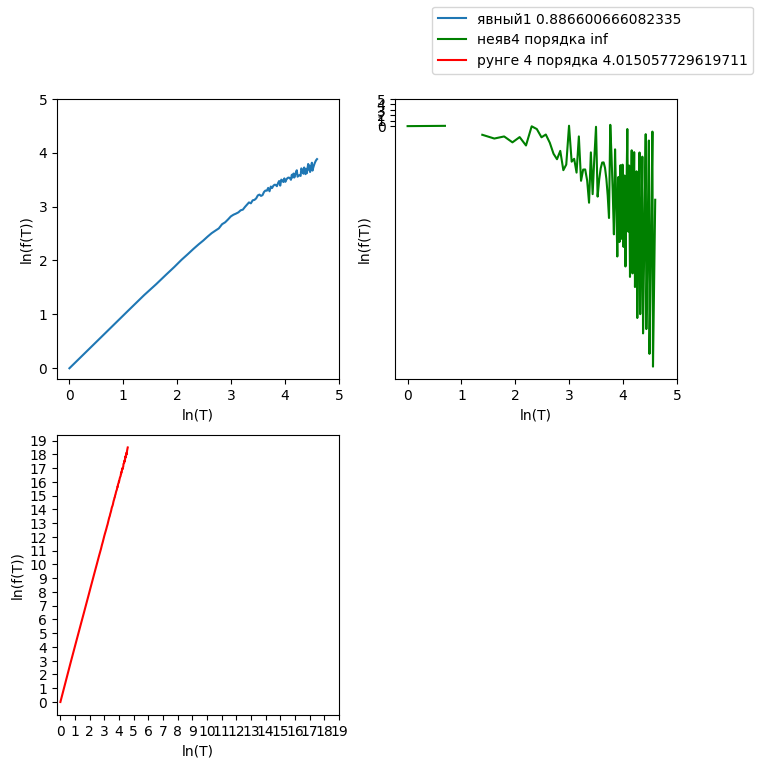

In [113]:
import math
from statistics import mean
import matplotlib.pyplot as plt
from typing import Callable

from num_methods import Solver2
from drawing import draw

def f(T_in):
    T = T_in
    C1 = 1
    C2 = 2
    # T = 0.001
    t_start = 0
    t_finish = 10
    a = 1
    c = 0.5
    b = 0.60
    # Первый элемент это x, второй y
    variables = (T, a, b, c)
    # array0 = [(2, 0)]
    
    lst =  ((C1+3*C2*t_start) * math.e**(2*t_start), (C2 - C1 - 3 * C2 * t_start) * math.e**(2*t_start))
    sol = Solver2((fx2, fy2), [a, b, c], lst, (t_start, t_finish))
    array1 = sol.do_method(sol.explicit1_method, T_in, False)

    # array1 = do_method(explicit_method, t_start, t_finish, [lst], variables, False)
    array2 = do_method(implicit_method, t_start, t_finish, [lst], variables, False)
    array3 = do_method(explicit4_method, t_start, t_finish, [lst], variables, False)

    arrayx1 = [i[0] for i in array1[1]]
    arrayy1 = [i[1] for i in array1[1]]
    arrayx2 = [i[0] for i in array2[1]]
    arrayy2 = [i[1] for i in array2[1]]
    arrayx3 = [i[0] for i in array3[1]]
    arrayy3 = [i[1] for i in array3[1]]
    # arrayx4 = [i[0] for i in array3[1]]
    # arrayy4 = [i[1] for i in array3[1]]
    # print(len(array1[0]), len(array2[0]), len(array3[0]))
    max_dif = [0, 0, 0]
    tl = array2[0]
    for i in range(len(array1[0])):
        real_x = (C1+3*C2*tl[i]) * math.e**(2*tl[i])
        real_y = (C2 - C1 - 3 * C2 * tl[i]) * math.e**(2*tl[i])
        max_dif[0] = max(max_dif[0], abs(arrayx1[i] - real_x))
        max_dif[0] = max(max_dif[0], abs(arrayy1[i] - real_y))
        max_dif[1] = max(max_dif[1], abs(arrayx2[i] - real_x))
        max_dif[1] = max(max_dif[1], abs(arrayy2[i] - real_y))
        max_dif[2] = max(max_dif[2], abs(arrayx3[i] - real_x))
        max_dif[2] = max(max_dif[2], abs(arrayy3[i] - real_y))
    
    # args = np.linspace(t_start, t_finish, 500)
    # x_true = list([(C1+3*C2*t) * math.e**(2*t) for t in args])
    # draw([array2[0], args], [arrayx2, x_true], ['fake', 'real'])

    # break
    return max_dif
t_l = list()
diff_l1 = list()
diff_l2 = list()
diff_l3 = list()

t = 0.001
dif = f(t)
crd_move_y1 = math.log(dif[0])
crd_move_x = math.log(t)
crd_move_y2 = math.log(dif[1])
crd_move_y3 = math.log(dif[2])
T = 0.1
while t <= T:
    if abs(t - 0.2)<0.000001 or abs(t-0.5)<0.0000001:
        t += 0.001
        continue
    # print(t, end=" ")
    dif = f(t)
    print(t, dif[2])
    diff_l1.append(math.log(dif[0]) - crd_move_y1)
    diff_l2.append(math.log(dif[1]) - crd_move_y2)
    diff_l3.append(math.log(dif[2]) - crd_move_y3)
    t_l.append(math.log(t) - crd_move_x)
    t += 0.001
print()
# mdif = min(diff_l1)
# for i in range(len(t_l)):
#     if diff_l1[i] == mdif:
#         print(t_l[i], mdif)

fig1 = plt.figure(figsize=(8, 8))
px1 = fig1.add_subplot(221)
px2 = fig1.add_subplot(222)
px3 = fig1.add_subplot(223)

px1.plot(t_l, diff_l1, label="явный1" + f" {mean(diff_l1[i]/t_l[i] for i in range(1, len(t_l)))}")
px1.set_xticks(np.arange(0, math.ceil(math.log(T) - crd_move_x) + 1, step=1))
px1.set_yticks(np.arange(0, math.ceil(math.log(T) - crd_move_x) + 1, step=1))
px1.set_xlabel("ln(T)")
px1.set_ylabel("ln(f(T))")

px2.plot(t_l, diff_l2, label="неяв4 порядка" + f" {mean(diff_l2[i]/t_l[i] for i in range(1, len(t_l)))}", color="green")
to = max(math.ceil(math.log(dif[1]) - crd_move_y2), math.ceil(math.log(T) - crd_move_x))
px2.set_xticks(np.arange(0, to + 1, step=1))
px2.set_yticks(np.arange(0, to + 1, step=1))
px2.set_xlabel("ln(T)")
px2.set_ylabel("ln(f(T))")

px3.plot(t_l, diff_l3, label="рунге 4 порядка" + f" {mean(diff_l3[i]/t_l[i] for i in range(1, len(t_l)))}", color="red")
to = max(math.ceil(math.log(dif[2]) - crd_move_y3), math.ceil(math.log(T) - crd_move_x))
px3.set_xticks(np.arange(0, to + 1, step=1))
px3.set_yticks(np.arange(0, to + 1, step=1))
px3.set_xlabel("ln(T)")
px3.set_ylabel("ln(f(T))")

print(t_l)
fig1.legend()
fig1.show()
    

In [114]:
import math
from statistics import mean
import matplotlib.pyplot as plt
from typing import Callable

def slope1(x, y):
        return round(sum(y) / sum(x), 2)

def slope2(x, y):
    _xy = mean([i[0] * i[1] for i in zip(x, y)])
    _x = mean([i * i for i in x])
    return round((_xy - mean(x) * mean(y)) / (_x - mean(x) ** 2), 2)

def get_max_error(original: list[Callable], methods: list[Callable]) -> list[float]:
        errors: list[float] = []

        original_val = [[oe(i) for i in self._space] for oe in original]
        for m in methods:
            # значения для аппроксимированной функции - row
            # значения для функции точно - o_row (original_row)
            c_error = 0
            for (row, o_row) in zip(m(), original_val):
                for val, o_val in zip(row, o_row):
                    c_error = max(abs(val - o_val), c_error)
            errors.append(c_error)

        return errors

def get_error_by_step(original: list[Callable], interval: tuple[float, float],
                          methods: list[Callable]):

        # each list is for method, inside there are lists for step
        error_val: list[list[float]] = \
            [[] for _ in range(len(methods))]
        steps: list[float] = [interval[0]]

        while steps[-1] < interval[1]:
            set_step(steps[-1])
            c_errors = get_max_error(original, methods)
            for i in range(len(methods)):
                error_val[i].append(math.log2(c_errors[i]))
            steps.append(steps[-1] * 2)

        # чтобы начинались в (0, 0)
        for errors in error_val:
            fix = errors[0]
            for i in range(len(errors)):
                errors[i] -= fix

        steps = [math.log2(st) for st in steps[:-1]]
        for i in range(len(methods)):
            plt.plot(steps, error_val[i],
                     label=methods[i].__name__ + f" наклон: {abs(self.slope2(steps, error_val[i]))}")

        plt.xlabel("step")
        plt.ylabel("max error")
        plt.legend()
        plt.show()

def real_x(t_start):
    return (C1+3*C2*t_start) * math.e**(2*t_start)

def real_y(t_start):
    return (C2 - C1 - 3 * C2 * t_start) * math.e**(2*t_start)

get_error_by_step([real_x, real_y], [0, 5], [])

NameError: name 'set_step' is not defined